In [13]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [14]:
origin = read_excel("https://data.hossam.kr/F03/wine_3type.xlsx")

print(origin.info())

origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  kind 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,class_0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,class_0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,class_0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,class_0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,class_0


In [15]:
origin.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
kind                            0
dtype: int64

In [16]:
origin['kind'] = origin['kind'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    int64   
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    int6

In [17]:
origin.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


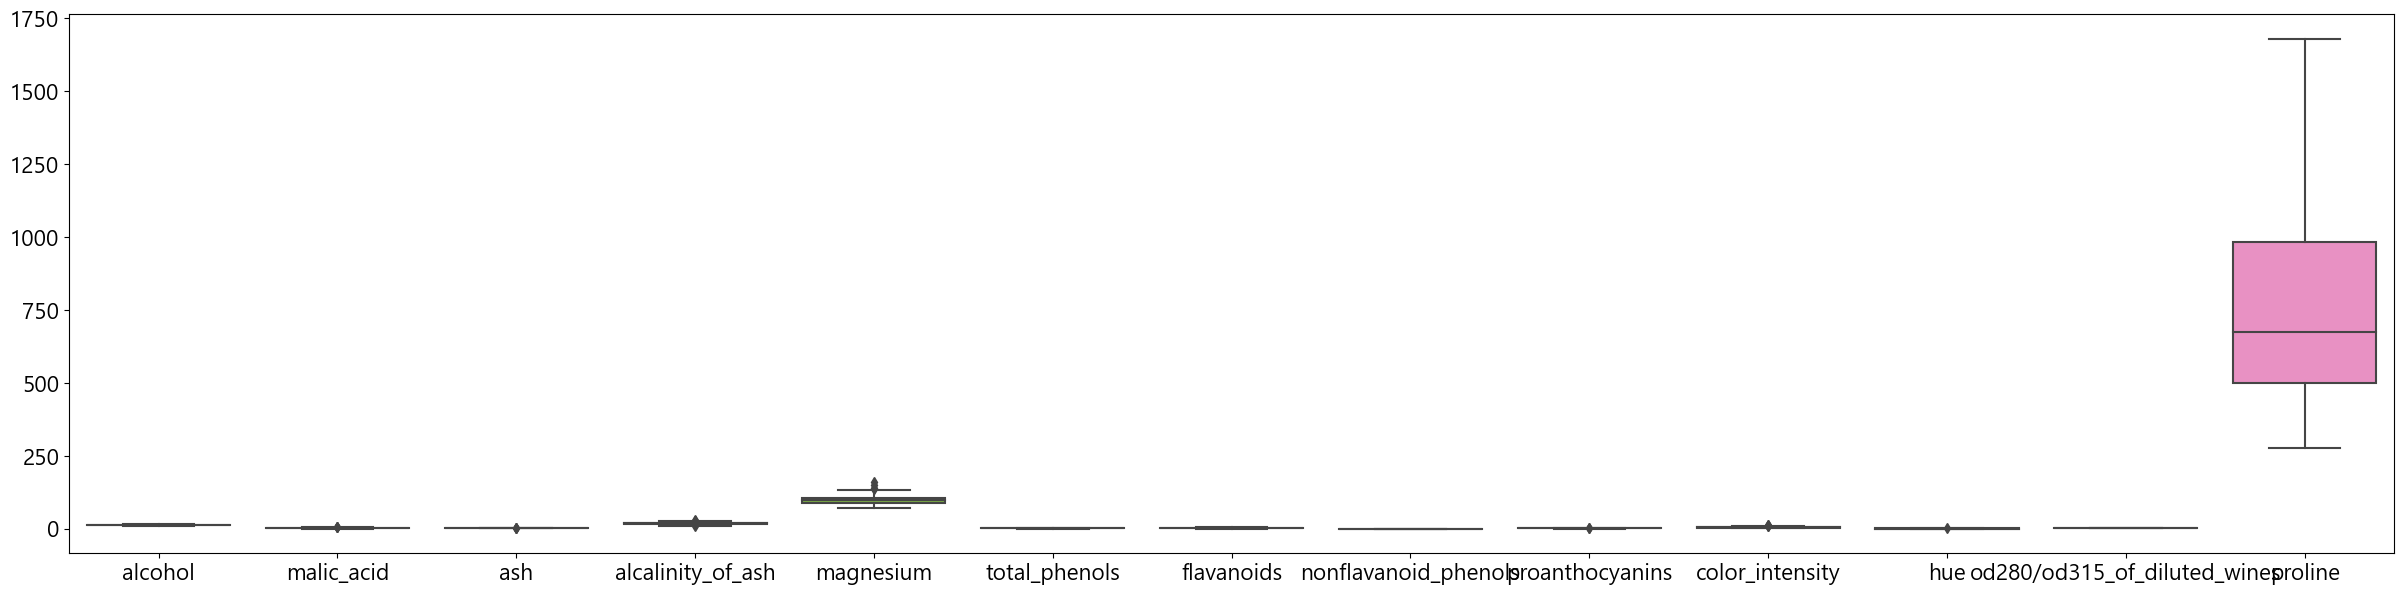

In [18]:
plt.figure(figsize=(30, 7))
sb.boxplot(data=origin)
plt.show()
plt.close()

In [19]:
np.random.seed(777)

In [20]:
x = origin.drop('kind', axis=1)
y = origin[['kind']]
print(x.shape, y.shape)
y

(178, 13) (178, 1)


,kind
0,class_0
1,class_0
2,class_0
3,class_0
4,class_0
...,...
173,class_2
174,class_2
175,class_2
176,class_2


In [21]:
y.value_counts()

kind   
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [22]:
y['kind'] = y['kind'].map({'class_0': 0, 'class_1': 1, 'class_2': 2})
y

C:\Users\user\AppData\Local\Temp\ipykernel_2808\653532542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['kind'] = y['kind'].map({'class_0': 0, 'class_1': 1, 'class_2': 2})


,kind
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [23]:
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [24]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
x_scale_df = DataFrame(x_scale, columns=x.columns, index=x.index)
x_scale_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_df, y_cate, test_size=0.3, random_state=777)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train

(124, 13) (54, 13) (124, 3) (54, 3)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
124,-1.396613,1.771674,0.085839,0.451946,-1.245695,0.905137,1.004700,-1.223610,2.311176,-0.976782,-0.910151,1.452436,-1.168369
136,-0.927212,2.139716,0.634140,0.451946,-0.754202,-1.466313,-1.565455,1.354888,-1.385721,-0.522583,-0.910151,-1.895054,-0.085641
162,-0.186053,0.838105,0.780354,0.752231,0.439425,-1.033684,-1.434939,1.918935,-1.105388,0.225763,-0.383670,-0.708602,-0.563315
27,0.369816,-0.553273,-0.827996,-0.749194,-0.403135,0.168065,0.161368,-0.740141,-0.422075,-0.479326,0.274431,0.223610,1.713598
35,0.592164,-0.472483,0.158946,0.301803,0.018145,0.648764,0.954502,-0.820719,0.471488,0.018129,0.362177,1.212320,0.551257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-1.668371,-0.598156,0.926567,1.953371,-0.824415,-0.601054,-0.420933,0.307374,-0.439596,-1.063296,1.766126,0.845085,-0.588791
166,0.555106,1.224100,0.853460,1.052516,0.790492,-0.953567,-1.113670,0.549108,-0.229346,2.431870,-0.471417,-1.485445,-0.165254
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
47,1.110975,-0.589180,-0.901103,-1.049479,0.088358,1.289697,1.366128,-1.223610,0.962071,0.450699,-0.208177,1.014578,0.758249


In [26]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(x_train.columns), )))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1091 (4.26 KB)
Trainable params: 1091 (4.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
4/4 [==============================] - 1s 61ms/step - loss: 1.1725 - acc: 0.2258 - val_loss: 1.0371 - val_acc: 0.4259 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0435 - acc: 0.4516 - val_loss: 0.9277 - val_acc: 0.6852 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9348 - acc: 0.6613 - val_loss: 0.8312 - val_acc: 0.8333 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 0.8374 - acc: 0.7984 - val_loss: 0.7471 - val_acc: 0.8889 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7526 - acc: 0.8387 - val_loss: 0.6745 - val_acc: 0.9259 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6772 - acc: 0.8629 - val_loss: 0.6118 - val_acc: 0.9259 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6128 - acc: 0.8952 - val_loss: 0.5580 - val_acc: 0.9259 - lr: 0.0010
E

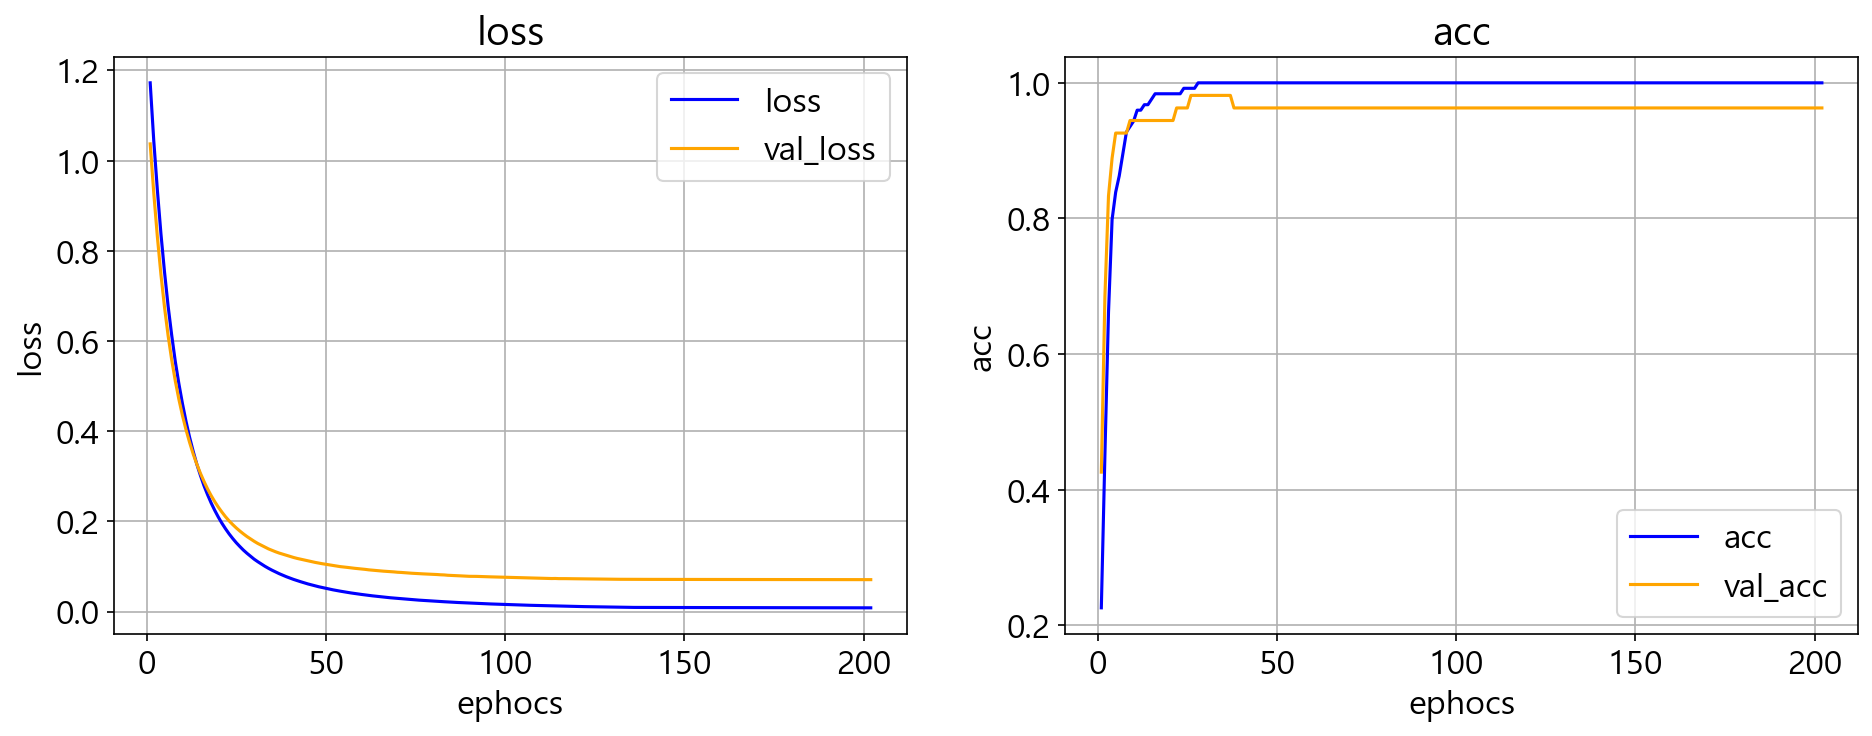

4/4 [==============================] - 0s 2ms/step - loss: 0.0082 - acc: 1.0000
최종 훈련 손실률: 0.008226, 최종 훈련 정확도: 1.000000
2/2 [==============================] - 0s 3ms/step - loss: 0.0707 - acc: 0.9630
최종 검증 손실률: 0.070744, 최종 검증 정확도: 0.962963


In [28]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))